# Определение перспективного тарифа для телеком-компании

Целью исследования в проекте является определение коммерчески перспективного тарифа. Исходными данными являются данные о 500 абонентах и совершённых ими звонках, отправленных сообщениях, трафике.

Описание данных
Таблица users (информация о пользователях):
user_id — уникальный идентификатор пользователя
first_name — имя пользователя
last_name — фамилия пользователя
age — возраст пользователя (годы)
reg_date — дата подключения тарифа (день, месяц, год)
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
city — город проживания пользователя
tariff — название тарифного плана
Таблица calls (информация о звонках):
id — уникальный номер звонка
call_date — дата звонка
duration — длительность звонка в минутах
user_id — идентификатор пользователя, сделавшего звонок
Таблица messages (информация о сообщениях):
id — уникальный номер сообщения
message_date — дата сообщения
user_id — идентификатор пользователя, отправившего сообщение
Таблица internet (информация об интернет-сессиях):
id — уникальный номер сессии
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
session_date — дата интернет-сессии
user_id — идентификатор пользователя
Таблица tariffs (информация о тарифах):
tariff_name — название тарифа
rub_monthly_fee — ежемесячная абонентская плата в рублях
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
messages_included — количество сообщений в месяц, включённых в абонентскую плату
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
rub_per_message — стоимость отправки сообщения сверх тарифного пакета
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

                     Содержание
1.  Загрузка библиотек и файлов.
2.  Исследование данных на аномалии,пропуски,дубликаты.
3.  Предварительная обработка данных.
4.  Слияние таблиц.
5.  Расчет выручки для двух тарифов.
6.  Расчет средней выручки,дисперсии и стандартного отклонения по тарифу ULTRA.
7.  Расчет средней выручки,дисперсии и стандартного отклонения по тарифу SMART.
8.  Распределение количества звонков по абонентам и тарифам.  
9.  Распределение среднего количества звонков по месяцам и по тарифам.
9.1   Расчет среднемесячных значений продолжительности звонка,сообщений и трафика
10. Таблицы статистики для средних значений длительности звонков,количества сообщений и трафика.
10.1  Визуализация статистики для средних значений длительности звонков,количества сообщений и трафика
11. Гистограммы длительности звонков,количества сообщений и трафика.
12. Гистограммы выручки для двух тарифов.
13. Гистограммы и рассчет средней выручки для Москвы и других городов.
14. Гипотезы.
14.1 Гипотеза о средней выручке пользователей тарифов ULTRA и SMART.
14.2.Гипотеза о средней выручке пользователей в Москве и других городах.
15.Общий вывод проекта.

1.  Загрузка библиотек и файлов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats as st
from math import factorial

import math

In [2]:
calls=pd.read_csv('C:/Users/анатолий/Documents/datasets/calls.csv')#            данные о звонках
internet=pd.read_csv('C:/Users/анатолий/Documents/datasets/internet.csv')#      данные интернет трафика
messages=pd.read_csv('C:/Users/анатолий/Documents/datasets/messages.csv')#      данные о сообщениях
tariffs=pd.read_csv('C:/Users/анатолий/Documents/datasets/tariffs.csv')#        данные о тарифах
users=pd.read_csv('C:/Users/анатолий/Documents/datasets/users.csv')#            данные об абонентах

 2.  Исследование данных на аномалии,пропуски,дубликаты.                    

In [3]:
calls.info()
calls.isna().sum() # здесь все правильно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [4]:
internet.info()
internet.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [5]:
messages.info()
messages.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


id              0
message_date    0
user_id         0
dtype: int64

In [6]:
tariffs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
users.info()
users.isna().sum()
users.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


0

После проведения анализа обнаружили,что в датасетах проблемных данных не выявлено.

 3.  Предварительная обработка данных

In [8]:
# приведение  к формату времени и выделение месяца
users['churn_date']=pd.to_datetime(users['churn_date'],format='%Y-%m-%d')
users['reg_date']=pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
users['reg_date_month']=pd.DatetimeIndex(users['reg_date']).month.astype('int')

In [9]:
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_date_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


В таблице с пользователями привели к формату времени необходимые колонки и создали дополнительные колонки времени по месяцам.

In [10]:
internet['session_date']=pd.to_datetime(internet['session_date'],format='%Y-%m-%d')
internet['session_date_month']=pd.DatetimeIndex(internet['session_date']).month
internet.rename(columns={'id':'traffic'},inplace=True) #  здесь переименовали столбец 

In [11]:
#способ 1: сначала приведём МБ к ГБ и округлим, а потом сложим все ГБ за месяц
print('способ 1:', np.ceil(2500/1024)+np.ceil(2500/1024))
#способ 2 (из примечания): сложим все мегабайты за месяц, приведем сумму к ГБ и затем округлим
print('способ 2:', np.ceil((2500+2500)/1024))

способ 1: 6.0
способ 2: 5.0


In [12]:
display(internet.head())

,Unnamed: 0,traffic,mb_used,session_date,user_id,session_date_month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


In [13]:
calls['call_date']=pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
calls['call_date_month']=pd.DatetimeIndex(calls['call_date']).month
calls['duration']=(calls['duration']).apply(np.ceil).astype('int')#  округляем время разговора
calls.rename(columns={'id':'calls'},inplace=True)#  здесь переименовали столбец


In [14]:
display(calls.head())
calls.shape

,calls,call_date,duration,user_id,call_date_month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


(202607, 5)

В таблице с информацией о звонках сделали колонку по месяцам и округлили время разговора до полных минут в большую сторону.

In [15]:
messages['message_date']=pd.to_datetime(messages['message_date'],format='%Y-%m-%d')
messages['message_date_month']=pd.DatetimeIndex(messages['message_date']).month
messages.rename(columns={'id':'messages'},inplace=True)

In [16]:
display(messages)


,messages,message_date,user_id,message_date_month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [17]:
display(tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


  4.  Слияние таблиц.

In [18]:
# количество звонков абонента по месяцам
data_id = pd.merge(users,calls,how='outer',on='user_id').pivot_table(index='user_id',values=['calls'],\
                                        columns=['call_date_month'],aggfunc='count')
data_id = pd.DataFrame(data_id.stack())# вытягиваем в линейку и уходят NaN
data_id.index.names = ('user_id','month')#замена названий столбцов
display(data_id)

calls
user_id month       
1000    5.0     22.0
        6.0     43.0
        7.0     47.0
        8.0     52.0
        9.0     58.0
...              ...
1498    10.0    41.0
1499    9.0      9.0
        10.0    68.0
        11.0    74.0
        12.0    69.0

[3174 rows x 1 columns]

In [19]:
#количество минут разговора по месяцам
data_calls=pd.merge(users,calls,how='outer',on='user_id').pivot_table(index='user_id',values=['duration'],\
                                        columns='call_date_month',aggfunc='sum')

data_calls = pd.DataFrame(data_calls.stack())# вытягиваем в линейку и уходят NaN
data_calls.index.names = ('user_id','month')
display(data_calls)

duration
user_id month          
1000    5.0       159.0
        6.0       172.0
        7.0       340.0
        8.0       408.0
        9.0       466.0
...                 ...
1498    10.0      247.0
1499    9.0        70.0
        10.0      449.0
        11.0      612.0
        12.0      492.0

[3174 rows x 1 columns]

In [20]:
#количество отправленных сообщение по месяцам
data_messages=pd.merge(users,messages,how='outer',on='user_id').pivot_table(index='user_id',values=['messages'],\
                                        columns='message_date_month',aggfunc='count')
data_messages = pd.DataFrame(data_messages.stack())# вытягиваем в линейку и уходят NaN
data_messages.index.names = ('user_id','month')#замена названий столбцов
display(data_messages)

messages
user_id month          
1000    5.0        22.0
        6.0        60.0
        7.0        75.0
        8.0        81.0
        9.0        57.0
...                 ...
1498    10.0       42.0
1499    9.0        11.0
        10.0       48.0
        11.0       59.0
        12.0       66.0

[2717 rows x 1 columns]

In [21]:
#объем израсходованного трафика по месяцам с округлением до Гб.
data_internet=pd.merge(users,internet,how='outer',on='user_id').pivot_table(index='user_id',values=['mb_used'],\
                                        columns='session_date_month',aggfunc='sum')

data_internet = pd.DataFrame(data_internet.stack())# вытягиваем в линейку и уходят NaN
data_internet.index.names = ('user_id', 'month')
data_internet['mb_used']=(data_internet['mb_used']/1024).apply(np.ceil).astype('int')# округляем трафик суммарно по месяцам
display(data_internet)

mb_used
user_id month         
1000    5.0          3
        6.0         23
        7.0         14
        8.0         14
        9.0         15
...                ...
1498    10.0        21
1499    9.0          2
        10.0        18
        11.0        18
        12.0        13

[3203 rows x 1 columns]

In [22]:
# собираем данные в одну таблицу
data_monthly=data_calls.merge(data_id,how='outer',on=['user_id','month'])
data_monthly=data_monthly.merge(data_internet,how='outer',on=['user_id','month'])
data_monthly=data_monthly.merge(data_messages,how='outer',on=['user_id','month'])
tariffs=tariffs.rename(columns={'tariff_name':'tariff'})# переименовали столбец для объединения

#собираем таблицу и убираем мультииндексы
data_monthly = data_monthly.reset_index().merge(users.loc[:, ['user_id', 'city', 'tariff']],\
                                                                        on='user_id', how='outer').fillna(0)
data_monthly=data_monthly.merge(tariffs,on='tariff',how='left')# присоединили таблицу тарифов

display(data_monthly.head(9))
data_monthly.info()


,user_id,month,duration,calls,mb_used,messages,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,22.0,3.0,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,43.0,23.0,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,47.0,14.0,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,52.0,14.0,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,58.0,15.0,57.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
5,1000,10.0,350.0,57.0,15.0,73.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
6,1000,11.0,338.0,43.0,15.0,58.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
7,1000,12.0,333.0,46.0,10.0,70.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
8,1001,11.0,430.0,59.0,18.0,0.0,Москва,smart,50,15360,500,550,200,3,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   month                  3216 non-null   float64
 2   duration               3216 non-null   float64
 3   calls                  3216 non-null   float64
 4   mb_used                3216 non-null   float64
 5   messages               3216 non-null   float64
 6   city                   3216 non-null   object 
 7   tariff                 3216 non-null   object 
 8   messages_included      3216 non-null   int64  
 9   mb_per_month_included  3216 non-null   int64  
 10  minutes_included       3216 non-null   int64  
 11  rub_monthly_fee        3216 non-null   int64  
 12  rub_per_gb             3216 non-null   int64  
 13  rub_per_message        3216 non-null   int64  
 14  rub_per_minute         3216 non-null   int64  
dtypes: f

    5.  Расчет выручки для двух тарифов.

In [23]:
# расчет перерасхода по пакетам услуг для 2х тарифов

data_monthly['over_duration'] = (data_monthly['duration'] - data_monthly['minutes_included']).clip(lower=0)
data_monthly['over_messages'] = (data_monthly['messages'] - data_monthly['messages_included']).clip(lower=0)
data_monthly['over_traffic'] = (data_monthly['mb_used'] - data_monthly['mb_per_month_included']/ 1024).clip(lower=0).\
                                                                               astype('int')
data_monthly.head(9)

,user_id,month,duration,calls,mb_used,messages,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_duration,over_messages,over_traffic
0,1000,5.0,159.0,22.0,3.0,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0
1,1000,6.0,172.0,43.0,23.0,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0
2,1000,7.0,340.0,47.0,14.0,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0
3,1000,8.0,408.0,52.0,14.0,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0
4,1000,9.0,466.0,58.0,15.0,57.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0
5,1000,10.0,350.0,57.0,15.0,73.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0
6,1000,11.0,338.0,43.0,15.0,58.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0
7,1000,12.0,333.0,46.0,10.0,70.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0
8,1001,11.0,430.0,59.0,18.0,0.0,Москва,smart,50,15360,500,550,200,3,3,0.0,0.0,3


In [24]:
# считаем доплаты за перерасход предоставленных  в тариф услуг
data_monthly['over_duration_pay'] = data_monthly['over_duration'] * data_monthly['rub_per_minute'].astype('int')
data_monthly['over_messages_pay'] = data_monthly['over_messages'] * data_monthly['rub_per_message'].astype('int')
data_monthly['over_traffic_pay'] = data_monthly['over_traffic'] * data_monthly['rub_per_gb'].astype('int')
data_monthly['total_add_pay'] = data_monthly['over_duration_pay'] + data_monthly['over_messages_pay']\
+ data_monthly['over_traffic_pay']
data_monthly['total_pay'] = data_monthly['total_add_pay'] + data_monthly['rub_monthly_fee']
display(data_monthly.head(15))
data_monthly.info()

,user_id,month,duration,calls,mb_used,messages,city,tariff,messages_included,mb_per_month_included,...,rub_per_message,rub_per_minute,over_duration,over_messages,over_traffic,over_duration_pay,over_messages_pay,over_traffic_pay,total_add_pay,total_pay
0,1000,5.0,159.0,22.0,3.0,22.0,Краснодар,ultra,1000,30720,...,1,1,0.0,0.0,0,0.0,0.0,0,0.0,1950.0
1,1000,6.0,172.0,43.0,23.0,60.0,Краснодар,ultra,1000,30720,...,1,1,0.0,0.0,0,0.0,0.0,0,0.0,1950.0
2,1000,7.0,340.0,47.0,14.0,75.0,Краснодар,ultra,1000,30720,...,1,1,0.0,0.0,0,0.0,0.0,0,0.0,1950.0
3,1000,8.0,408.0,52.0,14.0,81.0,Краснодар,ultra,1000,30720,...,1,1,0.0,0.0,0,0.0,0.0,0,0.0,1950.0
4,1000,9.0,466.0,58.0,15.0,57.0,Краснодар,ultra,1000,30720,...,1,1,0.0,0.0,0,0.0,0.0,0,0.0,1950.0
5,1000,10.0,350.0,57.0,15.0,73.0,Краснодар,ultra,1000,30720,...,1,1,0.0,0.0,0,0.0,0.0,0,0.0,1950.0
6,1000,11.0,338.0,43.0,15.0,58.0,Краснодар,ultra,1000,30720,...,1,1,0.0,0.0,0,0.0,0.0,0,0.0,1950.0
7,1000,12.0,333.0,46.0,10.0,70.0,Краснодар,ultra,1000,30720,...,1,1,0.0,0.0,0,0.0,0.0,0,0.0,1950.0
8,1001,11.0,430.0,59.0,18.0,0.0,Москва,smart,50,15360,...,3,3,0.0,0.0,3,0.0,0.0,600,600.0,1150.0
9,1001,12.0,414.0,63.0,14.0,0.0,Москва,smart,50,15360,...,3,3,0.0,0.0,0,0.0,0.0,0,0.0,550.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   month                  3216 non-null   float64
 2   duration               3216 non-null   float64
 3   calls                  3216 non-null   float64
 4   mb_used                3216 non-null   float64
 5   messages               3216 non-null   float64
 6   city                   3216 non-null   object 
 7   tariff                 3216 non-null   object 
 8   messages_included      3216 non-null   int64  
 9   mb_per_month_included  3216 non-null   int64  
 10  minutes_included       3216 non-null   int64  
 11  rub_monthly_fee        3216 non-null   int64  
 12  rub_per_gb             3216 non-null   int64  
 13  rub_per_message        3216 non-null   int64  
 14  rub_per_minute         3216 non-null   int64  
 15  over

6. Расчет средней выручки,дисперсии и стандартного отклонения по тарифу ULTRA.

In [25]:
print('СУММА ВЫРУЧКИ ДЛЯ ТАРИФА ULTRA ,руб.:',data_monthly[data_monthly['tariff'] == 'ultra']['total_pay'].sum())
print('Среднее значение выручки для тарифа ULTRA: {:.2f},\n'.format(
    data_monthly[data_monthly['tariff'] == 'ultra']['total_pay'].mean()
),'дисперсия: {:.2f}\n'.format(
    np.var(data_monthly[data_monthly['tariff'] == 'ultra']['total_pay'])
),'стандартное отклонение: {:.2f}\n'.format(
    np.std(data_monthly[data_monthly['tariff'] == 'ultra']['total_pay'])))

СУММА ВЫРУЧКИ ДЛЯ ТАРИФА ULTRA ,руб.: 2041050.0
Среднее значение выручки для тарифа ULTRA: 2070.03,
 дисперсия: 141244.32
 стандартное отклонение: 375.82



7. Расчет средней выручки,дисперсии и стандартного отклонения по тарифу SMART.

In [26]:
print('СУММА ВЫРУЧКИ ДЛЯ ТАРИФА SMART ,руб.:',data_monthly[data_monthly['tariff'] == 'smart']['total_pay'].sum())
print('Среднее значение выручки для тарифа SMART: {:.2f},\n'.format(
    data_monthly[data_monthly['tariff'] == 'smart']['total_pay'].mean()
),'дисперсия: {:.2f}\n'.format(
    np.var(data_monthly[data_monthly['tariff'] == 'smart']['total_pay'])
),'стандартное отклонение: {:.2f}\n'.format(
    np.std(data_monthly[data_monthly['tariff'] == 'smart']['total_pay'])))

СУММА ВЫРУЧКИ ДЛЯ ТАРИФА SMART ,руб.: 2875901.0
Среднее значение выручки для тарифа SMART: 1289.64,
 дисперсия: 669430.44
 стандартное отклонение: 818.19



Из полученных результатов видим,что средняя выручка на одного абонента для тарифа Ультра больше средней выручки
для тарифа Смарт.

8. Распределение количества звонков по абонентам и тарифам.

<AxesSubplot:title={'center':'СРЕДНЕЕ КОЛИЧЕСТВО ЗВОНКОВ ТАРИФА SMART'}, xlabel='user_id'>

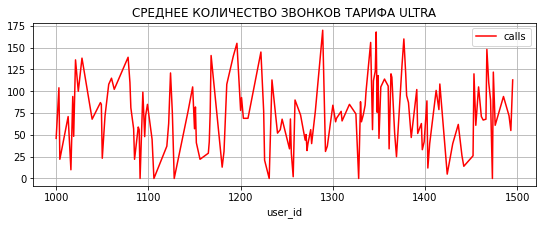

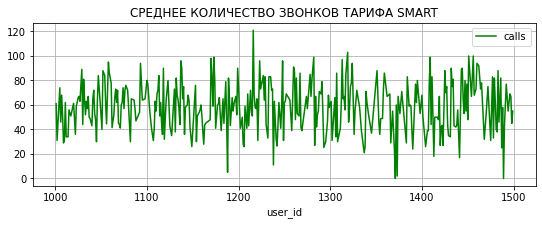

In [27]:
# распределение количества звонков по абонентам и тарифам
data_monthly[data_monthly['tariff'] == 'ultra'].pivot_table(index='user_id',values='calls',aggfunc='mean').\
       plot(y='calls',color='red',figsize=(9,3),title='СРЕДНЕЕ КОЛИЧЕСТВО ЗВОНКОВ ТАРИФА ULTRA',grid=True)
data_monthly[data_monthly['tariff'] == 'smart'].pivot_table(index='user_id',values='calls',aggfunc='mean').\
         plot(y='calls',color='green',figsize=(9,3),title='СРЕДНЕЕ КОЛИЧЕСТВО ЗВОНКОВ ТАРИФА SMART',grid=True)

Видим что разброс в значениях среднего количества звонков больше для тарифа Ультра,но там и количество включенных минут больше.

9. Распределение среднего количества звонков по месяцам и по тарифам.

Text(0.5, 1.0, 'СРЕДНЕЕ КОЛИЧЕСТВО ЗВОНКОВ ПО МЕСЯЦАМ ТАРИФА SMART')

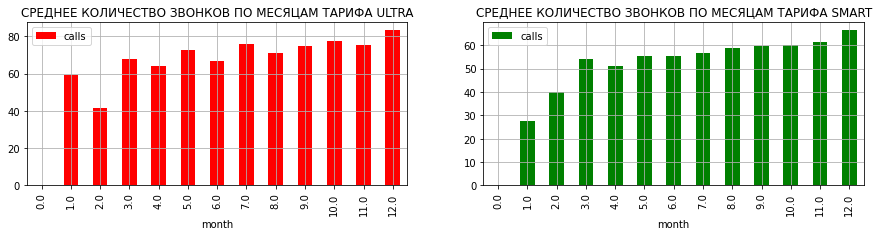

In [28]:
#  Распределение среднего количества звонков по месяцам и по тарифам
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,3))
data_monthly[data_monthly['tariff'] == 'ultra'].pivot_table(index='month',values='calls',aggfunc='mean').plot(y='calls',\
                                    grid=True,kind='bar',color='r',ax=ax1,subplots=True)
ax1.set_title('СРЕДНЕЕ КОЛИЧЕСТВО ЗВОНКОВ ПО МЕСЯЦАМ ТАРИФА ULTRA')                         
data_monthly[data_monthly['tariff'] == 'smart'].pivot_table(index='month',values='calls',aggfunc='mean').plot(y='calls',\
                                 grid=True,kind='bar',color='g',ax=ax2,subplots=True)
ax2.set_title('СРЕДНЕЕ КОЛИЧЕСТВО ЗВОНКОВ ПО МЕСЯЦАМ ТАРИФА SMART')                                

Здесь видим рост количества звонков с приближением Нового Года по двум тарифам.

9.1. Расчет среднемесячных значений продолжительности звонка,сообщений и трафика

In [29]:
display('Таблица среднемесячных значений продолжительности звонка,сообщений и трафика для тарифа ULTRA',\
     data_monthly[data_monthly['tariff'] == 'ultra'].pivot_table(index='month',values=['duration','messages','mb_used'],\
                    aggfunc={'duration':'mean','messages':'mean','mb_used':'mean'}).T)
display(data_monthly[data_monthly['tariff'] == 'ultra'].pivot_table(index='month',values=['duration','messages','mb_used'],\
                    aggfunc={'duration':'mean','messages':'mean','mb_used':'mean'}).describe().T)
display('Таблица среднемесячных значений продолжительности звонка,сообщений и трафика для тарифа SMART',\
     data_monthly[data_monthly['tariff'] == 'smart'].pivot_table(index='month',values=['duration','messages','mb_used'],\
                    aggfunc={'duration':'mean','messages':'mean','mb_used':'mean'}).T)
data_monthly[data_monthly['tariff'] == 'smart'].pivot_table(index='month',values=['duration','messages','mb_used'],\
                    aggfunc={'duration':'mean','messages':'mean','mb_used':'mean'}).describe().T

'Таблица среднемесячных значений продолжительности звонка,сообщений и трафика для тарифа ULTRA'

month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
duration,0.0,428.111111,297.125000,489.648649,458.018182,510.328358,479.702381,545.791209,510.775701,539.443478,558.081301,541.380597,592.805755
mb_used,0.0,13.222222,12.000000,17.648649,16.963636,19.373134,18.940476,20.505495,19.598131,19.243478,20.065041,19.805970,21.741007
messages,0.0,33.777778,21.958333,32.297297,31.563636,37.850746,41.726190,49.846154,48.439252,52.286957,58.430894,55.791045,60.611511


,count,mean,std,min,25%,50%,75%,max
duration,13.0,457.785517,156.262385,0.0,458.018182,510.328358,541.380597,592.805755
mb_used,13.0,16.854403,5.785271,0.0,16.963636,19.243478,19.805970,21.741007
messages,13.0,40.352292,16.915805,0.0,32.297297,41.726190,52.286957,60.611511


'Таблица среднемесячных значений продолжительности звонка,сообщений и трафика для тарифа SMART'

month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
duration,0.0,203.852941,298.689655,390.051948,367.133929,387.361702,395.640244,408.353234,421.468085,428.611538,426.136054,435.265823,478.560831
mb_used,0.0,8.735294,11.844828,15.233766,13.625000,15.907801,15.951220,15.875622,16.736170,16.392308,16.880952,17.000000,18.201780
messages,0.0,18.235294,24.086207,31.857143,30.741071,33.773050,33.402439,33.751244,33.638298,33.638462,33.765306,34.075949,35.994065


,count,mean,std,min,25%,50%,75%,max
duration,13.0,357.009691,127.644368,0.0,367.133929,395.640244,426.136054,478.560831
mb_used,13.0,14.029595,4.908690,0.0,13.625000,15.907801,16.736170,18.201780
messages,13.0,28.996810,9.989061,0.0,30.741071,33.638298,33.765306,35.994065


Анализируя представленные в таблицах результаты видим,что для тарифа ULTRA максимальные значения длительности разговоров,их средние значения, а также  для количества сообщений и интернет-трафика больше, чем для тарифа SMART.Это не удивительно,ведь
в тарифе ULTRA гораздо большие включенные услуги.
Для наглядного анализа ниже сделали визуализацию значений в таблицах.

10.1 Визуализация статистики для средних значений длительности звонков,количества сообщений и трафика.

<AxesSubplot:title={'center':'СРЕДНИЙ РАЗМЕР ТРАФИКА В МЕСЯЦ ДЛЯ ДВУХ ТАРИФОВ'}, xlabel='month'>

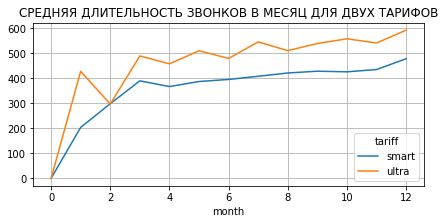

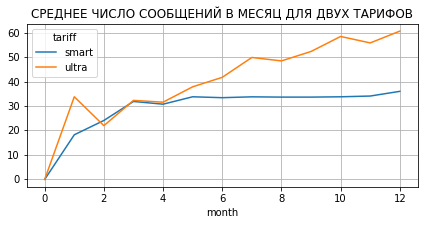

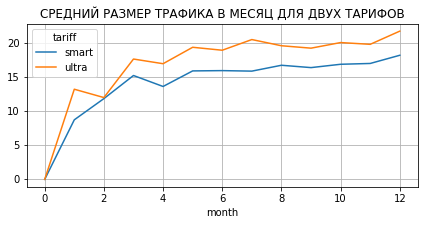

In [38]:
data_monthly.pivot_table(index='month',values='duration',columns='tariff',\
                    aggfunc='mean').plot(grid=True,figsize=(7,3),\
                title='СРЕДНЯЯ ДЛИТЕЛЬНОСТЬ ЗВОНКОВ В МЕСЯЦ ДЛЯ ДВУХ ТАРИФОВ')

data_monthly.pivot_table(index='month',values='messages',columns='tariff',\
                    aggfunc='mean').plot(grid=True,figsize=(7,3),\
                    title='СРЕДНЕЕ ЧИСЛО СООБЩЕНИЙ В МЕСЯЦ ДЛЯ ДВУХ ТАРИФОВ')

data_monthly.pivot_table(index='month',values='mb_used',columns='tariff',\
                    aggfunc='mean').plot(grid=True,figsize=(7,3),\
                     title='СРЕДНИЙ РАЗМЕР ТРАФИКА В МЕСЯЦ ДЛЯ ДВУХ ТАРИФОВ')


В подтверждение выше рассмотренному анализу статистических результатов на графиках для двух тарифов видим визуальные 
различия в значениях среднего времени разговора,количестве сообщений и трафика.

11. Гистограммы длительности звонков,количества сообщений и трафика.

Text(0.5, 1.0, 'ГИСТОГРАММА  ДЛИТЕЛЬНОСТИ ЗВОНКОВ SMART')

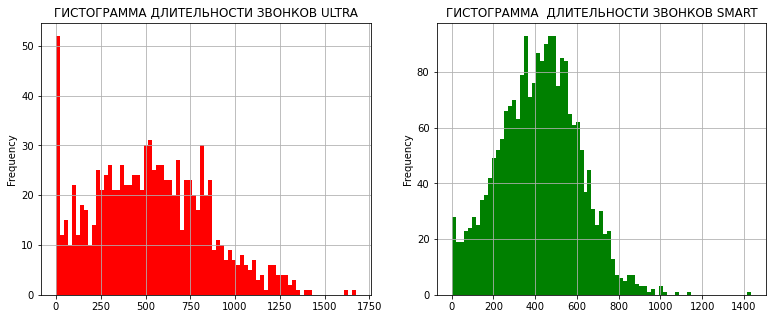

In [31]:
#гистограмма  длительности звонков.
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

data_monthly[data_monthly['tariff'] == 'ultra']['duration'].plot(y='duration',kind='hist',bins=75,\
                        color='r',grid=True,subplots=True,ax=ax1)
ax1.set_title('ГИСТОГРАММА ДЛИТЕЛЬНОСТИ ЗВОНКОВ ULTRA')

data_monthly[data_monthly['tariff'] == 'smart']['duration'].plot(y='duration',kind='hist',bins=75,\
                    color='green',grid=True,subplots=True,ax=ax2)
ax2.set_title('ГИСТОГРАММА  ДЛИТЕЛЬНОСТИ ЗВОНКОВ SMART')


Абоненты тарифа ULTRA говорят особо не сдерживая себя(достаточно широкая гистограмма).
Ну а абоненты SMART стараются уместится в лимит по длительности - видим что максимум разговоров в районе 500 минут

Text(0.5, 1.0, 'ГИСТОГРАММА КОЛИЧЕСТВА СООБЩЕНИЙ SMART')

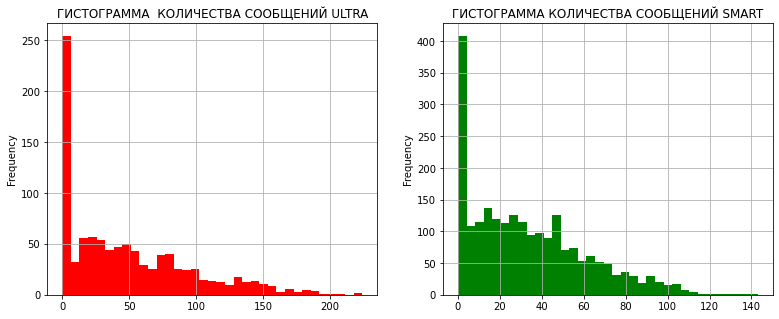

In [32]:
#гистограмма распределения  количества сообщений
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_monthly[data_monthly['tariff'] == 'ultra']['messages'].plot(y='messages',kind='hist',bins=35,\
                            color='red',grid=True,subplots=True,ax=ax1)
ax1.set_title('ГИСТОГРАММА  КОЛИЧЕСТВА СООБЩЕНИЙ ULTRA')
data_monthly[data_monthly['tariff'] == 'smart']['messages'].plot(y='messages',kind='hist',bins=35,\
                            color='green',grid=True,subplots=True,ax=ax2)
ax2.set_title('ГИСТОГРАММА КОЛИЧЕСТВА СООБЩЕНИЙ SMART')


Здесь абоненты SMART сберегая минуты активно смс отправляют, ну а ULTRA их поменьше-ведь можно спокойно и поговорить при таком
лимите то.

Text(0.5, 1.0, 'ГИСТОГРАММА  ОБЪЕМА ТРАФИКА SMART')

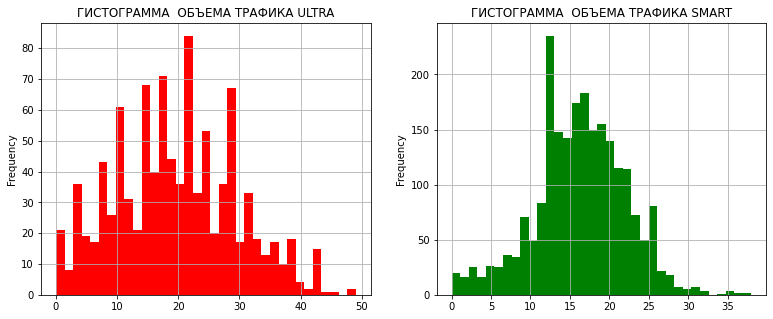

In [33]:
#гистограмма распределения среднего объема трафика
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_monthly[data_monthly['tariff'] == 'ultra']['mb_used'].plot(y='mb_used',kind='hist',bins=35,\
                    color='red',grid=True,subplots=True,ax=ax1)
ax1.set_title('ГИСТОГРАММА  ОБЪЕМА ТРАФИКА ULTRA')
data_monthly[data_monthly['tariff'] == 'smart']['mb_used'].plot(y='mb_used',kind='hist',bins=35,\
                    color='green',grid=True,subplots=True,ax=ax2)
ax2.set_title('ГИСТОГРАММА  ОБЪЕМА ТРАФИКА SMART')

Абоненты SMART определяюще сконцентрированы в районе 15 Гб ведь иначе придется доплачивать за излишки.
Абоненты ULTRA в среднем не особо выходят за лимит в 30 ГБ в своём большинстве и находятся в районе 20 Гб.

12. Гистограммы выручки для двух тарифов.

Text(0.5, 1.0, 'ГИСТОГРАММА ВЫРУЧКИ ДЛЯ ТАРИФА SMART')

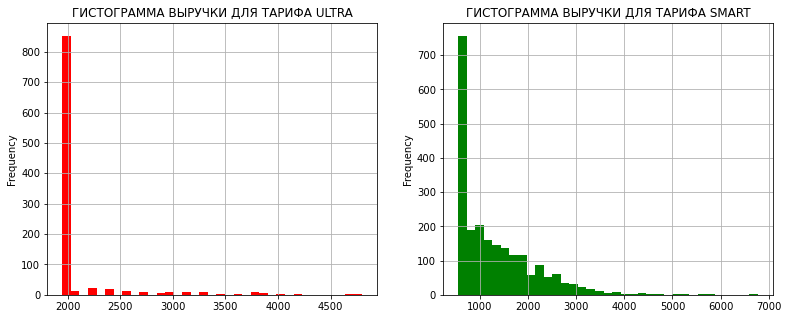

In [34]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_monthly[data_monthly['tariff'] == 'ultra']['total_pay'].plot(y='total_pay',kind='hist',bins=35,\
                        color='red',grid=True,subplots=True,ax=ax1)
ax1.set_title('ГИСТОГРАММА ВЫРУЧКИ ДЛЯ ТАРИФА ULTRA')
data_monthly[data_monthly['tariff'] == 'smart']['total_pay'].plot(y='total_pay',kind='hist',bins=35,\
                    color='green',grid=True,subplots=True,ax=ax2)
ax2.set_title('ГИСТОГРАММА ВЫРУЧКИ ДЛЯ ТАРИФА SMART')



Наконец то видим для тарифов пики с абанентской платой в 1950 рублей и 550 рублей - понятно что ее платят все что и видно
на представленных гистограммах.Для ULTRA она доминирует, а вот абонентам SMART приходится доплачивать за перерасход(есть
уширение вправо).

  13. Гистограммы и рассчет средней выручки для Москвы и других городов.

Средняя выручка для Москвы: 1546.71
 дисперсия:564710.71
 стандартное отклонение:751.47

Средняя выручка для других городов: 1524.73
 дисперсия:653818.49
 стандартное отклонение:808.59



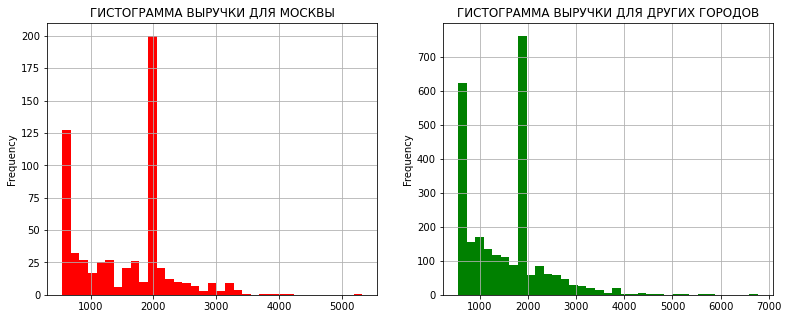

In [35]:
#гистограммы и рассчет выручки для Москвы
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_monthly[data_monthly['city'] == 'Москва']['total_pay'].\
             plot(y='total_pay',kind='hist',bins=35,\
                    color='red',grid=True,subplots=True,ax=ax1)
ax1.set_title('ГИСТОГРАММА ВЫРУЧКИ ДЛЯ МОСКВЫ')

#гистограммы и рассчет  выручки для других городов
data_monthly[data_monthly['city'] != 'Москва']['total_pay'].\
             plot(y='sum_rub_ultra',kind='hist',bins=35,\
                    color='g',grid=True,subplots=True,ax=ax2)
ax2.set_title('ГИСТОГРАММА ВЫРУЧКИ ДЛЯ ДРУГИХ ГОРОДОВ')

# расчет статистики выручки по Москве
print('Средняя выручка для Москвы: {:.2f}\n'.format(
    data_monthly[data_monthly['city'] == 'Москва']['total_pay'].mean()
),'дисперсия:{:.2f}\n'.format(
    np.var(data_monthly[data_monthly['city'] == 'Москва']['total_pay'])
),'стандартное отклонение:{:.2f}\n'.format(
    np.std(data_monthly[data_monthly['city'] == 'Москва']['total_pay'])))

# расчет статистики выручки для других городов
print('Средняя выручка для других городов: {:.2f}\n'.format(
    data_monthly[data_monthly['city'] != 'Москва']['total_pay'].mean()
),'дисперсия:{:.2f}\n'.format(
    np.var(data_monthly[data_monthly['city'] != 'Москва']['total_pay'])
),'стандартное отклонение:{:.2f}\n'.format(
    np.std(data_monthly[data_monthly['city'] != 'Москва']['total_pay'])))


Видим практически равенство средних значений выручки для Москвы и других городов(поговорить любят многие) и два характерных пика в выручке для каждого тарифа соответствующих абонентским платам. 

   14. Гипотезы.  

14.1.Гипотеза о средней выручке пользователей тарифов ULTRA и SMART.
Сформулируем нулевую гипотезу: средняя выручка пользователей тарифов Smart и Ultra одинакова. Альтернативная гипотеза: средняя выручка пользователей тарифов Smart и Ultra отличается.

In [40]:
hypot_1 = st.ttest_ind(data_monthly[data_monthly['tariff'] == 'ultra']['total_pay'],
             data_monthly[data_monthly['tariff'] == 'smart']['total_pay'],
            equal_var=False)
alpha=0.05
print('p-value гипотезы 1:', hypot_1.pvalue, '\n критическое значение: ', alpha)
if hypot_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value гипотезы 1: 1.927011394420941e-250 
 критическое значение:  0.05
Отвергаем нулевую гипотезу


Как и наблюдалось в статистических расчетах видим,что и гипотеза о равенстве тарифов не является верной.
Таким образом средние выручки пользователей разных тарифов статистически значимо отличаются

14.2.Гипотеза о средней выручке пользователей в Москве и других городах.
Сформулируем нулевую гипотезу: средняя выручка пользователей из Москвы и других регионов одинаковая.
Альтернативная гипотеза: средняя выручка пользователей из Москвы и других регионов  отличается.

КОММЕНТАРИЙ СТУДЕНТА: просто хотел поэкспериментировать

In [39]:
hypot_2 = st.ttest_ind(data_monthly[data_monthly['city'] != 'Москва']['total_pay'],
             data_monthly[data_monthly['city'] == 'Москва']['total_pay'],
            equal_var=False)
alpha=0.05
print('p-value гипотезы 2: ', hypot_2.pvalue, ',\n критическое значение: ', alpha)
if hypot_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value гипотезы 2:  0.5216952110000279 ,
 критическое значение:  0.05
Не получилось отвергнуть нулевую гипотезу


Принимаем нулевую гипотезу о равенстве средней выручки для Москвы и других городов,т.е.
средняя выручка абонентов из Москвы и других городов статистически значимо не отличаеся.

15.  Общий вывод проекта.

Проведен анализ финансовых показателей для двух тарифов по двум выборкам.В выборке тарифа ULTRA 149 абонентов,в выборке
SMART 351 абонентов.Для "чистоты " эксперимента хотелось бы иметь выборки с близкими количествами абонентов-но что есть то и анализируем.
Длительность разговоров и количество сообщений в тарифе ULTRA больше на 21-25%,чем в тарифе SMART,тогда как интернет трафик
меньше на 8,3%.
Пользователи тарифа ULTRA в среднем потребляют больше  услуг, чем пользователи тарифа SMART,но не израсходывают свои лимиты по звонкам и сообщениям.Пользователи тарифа SMART часто превышают пакетные лимиты.
Абоненты пакета ULTRA, обеспечивают большую среднюю выручку, за счёт существенно большей стоимостью тарифа. Различие между средней выручкой пользователей различных тарифов статистически значимо.
Средняя продолжительность звонка у абонентов разных тарифов статистически значимо не отличается.
Абоненты Москвы по своей средней выручке статистически значимо не отличаются от абонентов других городов.
Исходя из проведённых анализов можно сделать вывод, что с коммерческой точки зрения более перспективным является тариф ULTRA, поскольку он обеспечивает более высокую среднюю выручку.
